In [1]:
'''
Read iCESM d18O sea water

'''
from netCDF4 import Dataset
import numpy as np
import pandas
import numpy.ma as ma
from scipy import spatial

import pop_tools
import xarray as xr

from sys import platform as sys_pf
import matplotlib.pyplot as plt
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")
    import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap, shiftgrid, cm

#
icesm_dir = '/mnt/d/iCESM/PETM/'

x01nc = 'b.e12.B1850C5CN.f19_g16.iPETM01x.01.pop.h.R18O.210001-259912.nc'
x03nc = 'b.e12.B1850C5CN.f19_g16.iPETM03x.02.pop.h.R18O.150001-200012.nc'
x06nc = 'b.e12.B1850C5CN.f19_g16.iPETM06x.07.pop.h.R18O.150001-200012.nc'
x09nc = 'b.e12.B1850C5CN.f19_g16.iPETM09x.01.pop.h.R18O.150001-200012.nc'

t01nc = 'b.e12.B1850C5CN.f19_g16.iPETM01x.01.pop.h.TEMP.210001-259912.nc'
t03nc = 'b.e12.B1850C5CN.f19_g16.iPETM03x.02.pop.h.TEMP.150001-200012.nc'
t06nc = 'b.e12.B1850C5CN.f19_g16.iPETM06x.07.pop.h.TEMP.150001-200012.nc'
t09nc = 'b.e12.B1850C5CN.f19_g16.iPETM09x.01.pop.h.TEMP.150001-200012.nc'

proxy_dir = '/mnt/c/Users/mul450/Dropbox/git/deepDA/mlwrk/proxy/'
dbversion = 'petmproxy3slices_v0.0.13.csv'

print('read done')

read done


In [2]:
tn = 50 * 12 # the last 50 yr
nc_field = 'R18O'

### read proxies database ###
proxies = pandas.read_csv(proxy_dir + dbversion)
proxies_len0 = len(proxies)

d18Ow_full = np.full((proxies_len0,4),np.nan)

for j in range(4):
    
    if j == 0:
        r18o_fname = icesm_dir+x01nc
    elif j == 1:
        r18o_fname = icesm_dir+x03nc
    elif j == 2:
        r18o_fname = icesm_dir+x06nc
    elif j == 3:
        r18o_fname = icesm_dir+x09nc
        
    x = Dataset(r18o_fname).variables[nc_field][-1-tn:-1,0,:,:]
    xbm = np.nanmean(x,axis=0)
    xbmi = xbm.reshape((384*320,1))  # reshape
    
    if j == 0:
        X = Dataset(r18o_fname).variables['TLONG'][:,:]
        Y = Dataset(r18o_fname).variables['TLAT'][:,:]
        XY = np.array([X.reshape((384*320,1)),Y.reshape((384*320,1))])
        XY = XY.reshape((2,384*320))
        XY = np.swapaxes(XY,0,1)

    print(' Read {}'.format(r18o_fname))
    
    for i in range(proxies_len0):
        if proxies.Type[i] in ['d18O']:
            lonlat = [proxies.lonbci[i]+180, proxies.latbci[i]]
            indi = spatial.KDTree(XY).query(lonlat)[1]
            d18Ow_full[i,j] = xbmi[indi]*1000 - 1000
            print('  file {} lonlat {} d18Ow {}'.format(proxies.File[i],XY[indi], d18Ow_full[i,j]))
            
print(d18Ow_full)

 Read /mnt/d/iCESM/PETM/b.e12.B1850C5CN.f19_g16.iPETM01x.01.pop.h.R18O.210001-259912.nc
  file gutjahr2017-dsdp401d18omgca.txt lonlat [169.04278159  42.13838768] d18Ow -1.094970703125
  file tripati2005-527d18osoldadoensis.txt lonlat [162.27675963 -34.67998288] d18Ow -0.61126708984375
  file thomas1999-527d18oacarinina.txt lonlat [162.27675963 -34.67998288] d18Ow -0.61126708984375
  file thomas1999-527d18oacarinina.txt lonlat [162.27675963 -34.67998288] d18Ow -0.61126708984375
  file thomas1999-527d18oacarinina.txt lonlat [162.27675963 -34.67998288] d18Ow -0.61126708984375
  file stott-549d18omixthermo.txt lonlat [159.70252087  43.36211576] d18Ow -0.9739990234375
  file thomas2002-odpsite690b.txt lonlat [174.90224305 -65.2010915 ] d18Ow -1.8446044921875
  file kennett1991-odpsite690b.txt lonlat [174.90224305 -65.2010915 ] d18Ow -1.8446044921875
  file thomas1996-690d18ofora.txt lonlat [174.90224305 -65.2010915 ] d18Ow -1.8446044921875
  file thomas1996-690d18ofora.txt lonlat [174.90224

In [4]:
outputfilename = proxy_dir + 'd18osw_' + dbversion
np.savetxt(outputfilename, d18Ow_full, delimiter=',')

In [60]:
X.reshape((384*320,1))
XY = np.array([X.reshape((384*320,1)),Y.reshape((384*320,1))])
XY = XY.reshape((2,384*320))

XY = np.swapaxes(XY,0,1)
print(XY.shape)

loci = [55.1, -60.1]  # longitude, latitude

vali = XY[spatial.KDTree(XY).query(loci)[1]]
print(vali)


indi = spatial.KDTree(XY).query(loci)[1]
print(indi)
xbmi = xbm.reshape((384*320,1))
print(xbmi[indi]*1000 -1000)

(122880, 2)
[ 54.90306769 -59.99775098]
16278
[-1.12152099609375]


In [55]:
loci = [-125.1, -60.1]  # longitude, latitude

lon_offset = 180;
loni = loci[0] + lon_offset
lati = loci[1]

loni = int(loni * 10) / 10
lati = int(lati * 10) / 10

Xi = np.where(X == loni)
Yi = np.where(Y == lati)
print(lati)
print(Yi)

-60.1
(array([], dtype=int64), array([], dtype=int64))


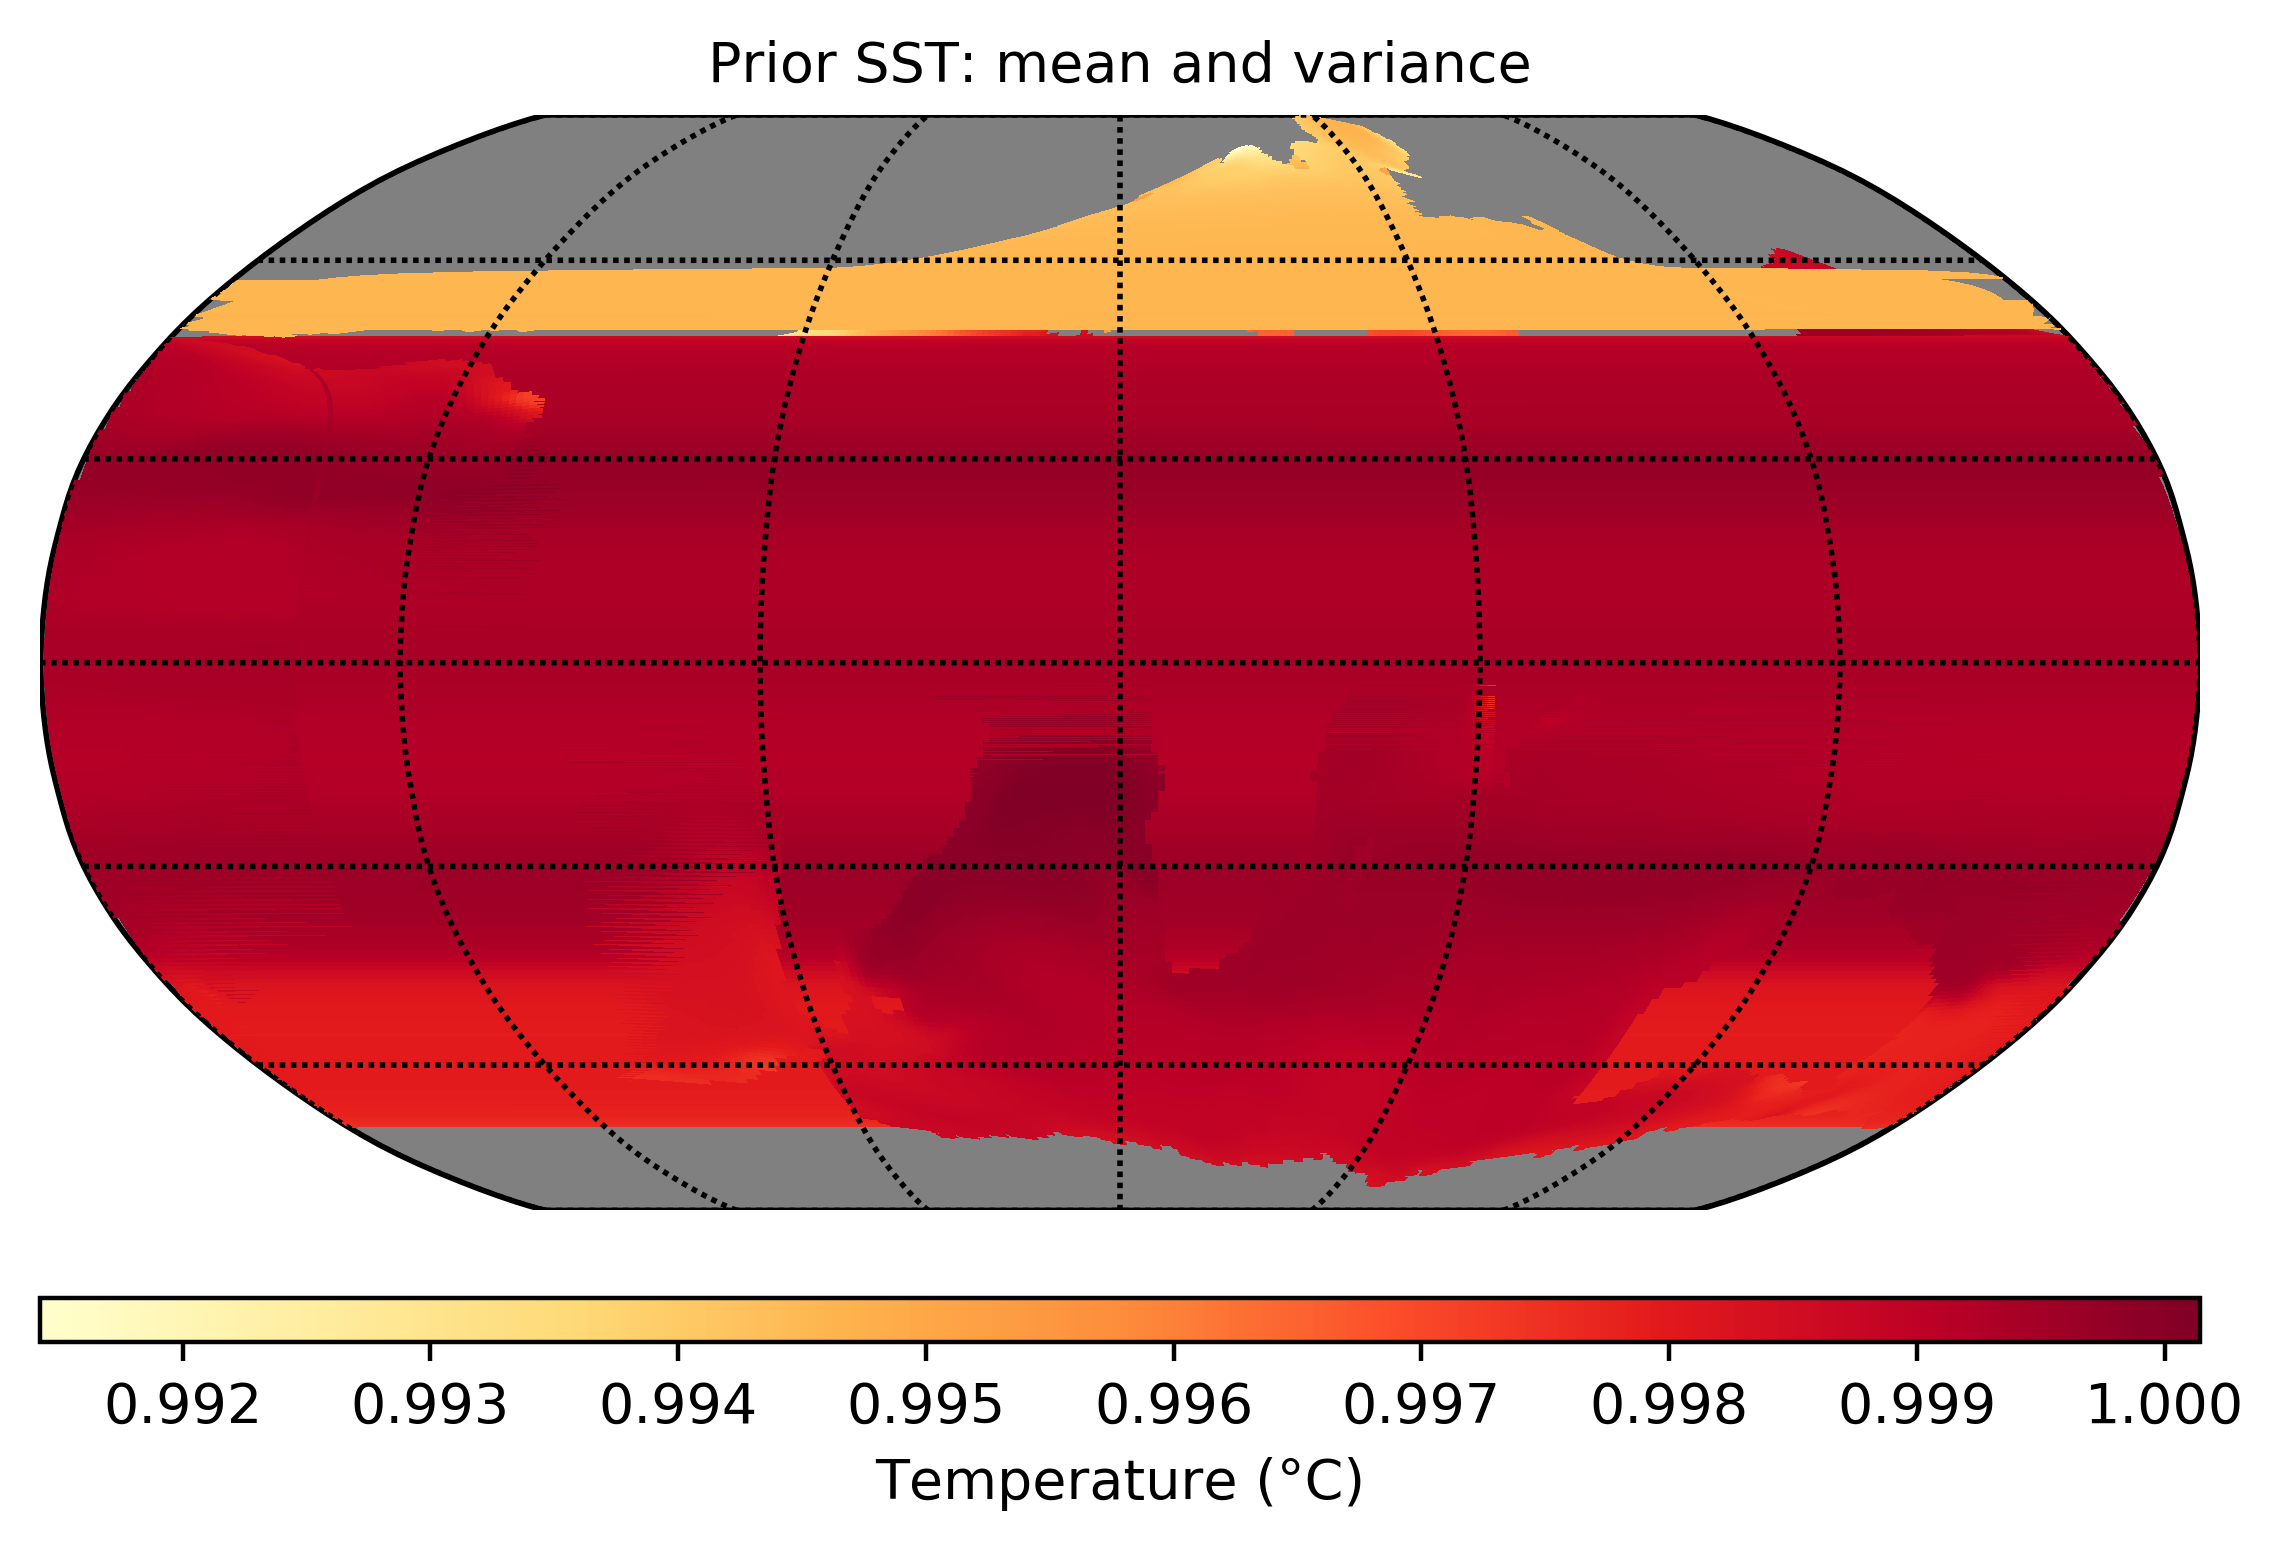

In [16]:
ploti = 1
if ploti == 1:
    # plot mean of prior
    fig = plt.figure(figsize=(6, 4.5), dpi=400)
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='robin', lon_0=0, lat_0 =0, resolution=None)
    # might consider 'cea', 'mbtfpq', 'moll', 'hammer', or 'robin' (recommended) projection
    m.drawmapboundary(fill_color='0.5')
    im1 = m.pcolormesh(X,Y,xbm,shading='flat',cmap=plt.cm.YlOrRd,latlon=True)
    m.drawparallels(np.arange(-90.,99.,30.))
    m.drawmeridians(np.arange(-180.,180.,60.))
    cb = m.colorbar(im1,"bottom", size="4%", pad="8%")
    cb.ax.tick_params(labelsize=10)
    cb.set_label(u'Temperature (\u00B0C)', fontsize=10)
    ax.set_title('Prior SST: mean and variance', fontsize = 10)    
    plt.show()

In [18]:
print('shape of X,Y,xbm {}, {}, {}'.format(X.shape,Y.shape,xbm.shape))

shape of X,Y,xbm (384, 320), (384, 320), (384, 320)
